In [64]:
from library import *

In [65]:
df = pd.read_csv('data/anon_cust_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [66]:
# df.sample(10)

##### Bringing it together:
Try to find out why customers churn
Can we predict which customers will churn?
Hint: The below can be useful
Coefficients from logistic models
Feature importance from tree based models
(edited)

In [67]:
df = df.drop(columns="Unnamed: 0")

In [68]:
df['TotalCharges'] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [69]:
df.loc[:, df.select_dtypes(include="object").columns] = df.select_dtypes(include="object").astype("string")


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [71]:
df["TotalCharges"].isnull().sum()

np.int64(11)

In [72]:
df[df["TotalCharges"].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


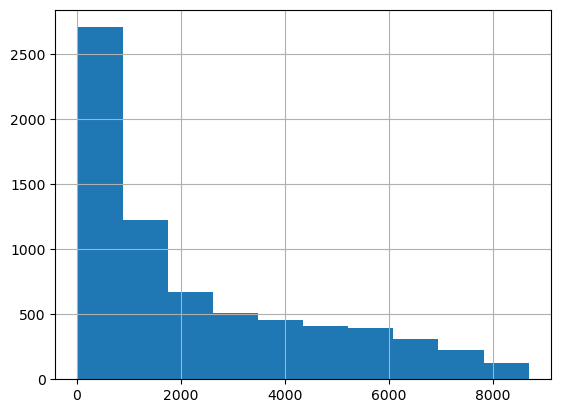

In [73]:
df['TotalCharges'].hist()
plt.show()

In [74]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [75]:
df['TotalCharges'].sort_values(ascending=True)

1654    18.80
1151    18.85
6489    18.85
4939    18.90
583     19.00
        ...  
3826      NaN
4380      NaN
5218      NaN
6670      NaN
6754      NaN
Name: TotalCharges, Length: 7043, dtype: float64

In [76]:
df = df.astype({col: "string" for col in df.select_dtypes(include="object").columns})

In [77]:
df_outlierless.describe()

NameError: name 'df_outlierless' is not defined

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   string 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   string 
 3   Dependents        7043 non-null   string 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   string 
 6   MultipleLines     7043 non-null   string 
 7   InternetService   7043 non-null   string 
 8   OnlineSecurity    7043 non-null   string 
 9   OnlineBackup      7043 non-null   string 
 10  DeviceProtection  7043 non-null   string 
 11  TechSupport       7043 non-null   string 
 12  StreamingTV       7043 non-null   string 
 13  StreamingMovies   7043 non-null   string 
 14  Contract          7043 non-null   string 
 15  PaperlessBilling  7043 non-null   string 
 16  PaymentMethod     7043 non-null   string 


In [ ]:
def model(df):
    # 3
    X = df.drop(columns= 'Churn')
    y = df['Churn']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    #4
    df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())

    #5
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = X.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
    numeric_transformer = Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="mean")),      # Fill missing values with the mean
            ("scaler", StandardScaler())                        # Scale values to 0-1
        ])

    categorical_transformer = Pipeline(steps=[
            ("onehot", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
        ])
        # Step 9: Combine into a ColumnTransformer
    preprocessor = ColumnTransformer(transformers=[
            ("num", numeric_transformer, numeric_features),
            ("cat", categorical_transformer, categorical_features)
        ])
        # Step 10: Create the full pipeline with preprocessing + model
    model_pipeline = Pipeline(steps=[
            ("preprocess", preprocessor),
            ("model", LogisticRegression())
        ])
        # Step 11: Fit the pipeline on the training data
    model_pipeline.fit(X_train, y_train)
        # Step 12: Evaluate or predict on the test set
    score = model_pipeline.score(X_test, y_test)
    y_pred = model_pipeline.predict(X_test)
    print(f"Test Accuracy Score for LogRegres: {score:.4f}")

     # ===============================
    # 🔥 GET COEFFICIENTS (this part)
    # ===============================
    # Get logistic regression model
    logreg = model_pipeline.named_steps["model"]

    # Get feature names from preprocessor
    feature_names = model_pipeline.named_steps["preprocess"].get_feature_names_out()

    # Combine features + coefficients into a dataframe
    coef_df = pd.DataFrame({
        "feature": feature_names,
        "coefficient": logreg.coef_[0]
    }).sort_values("coefficient", ascending=False)

    print("\n--- Logistic Regression Coefficients ---")
    print(coef_df)

    return coef_df

In [ ]:
model(df)

Test Accuracy Score for LogRegres: 0.8219


In [87]:
def tree_models(df):
    X = df.drop(columns='Churn')
    y = df['Churn']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())

    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = X.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

    numeric_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ("onehot", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
    ])

    preprocessor = ColumnTransformer(transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ])

    model_pipeline = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("model", RandomForestClassifier(random_state=42))
    ])

    model_pipeline.fit(X_train, y_train)

    # Initial evaluation
    y_pred = model_pipeline.predict(X_test)
    print("\n--- INITIAL MODEL EVALUATION ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Hyperparameter tuning
    param_grid = {
        "model__n_estimators": [50, 100],
        "model__max_depth": [None, 5, 10]
    }

    grid_search = GridSearchCV(model_pipeline, param_grid, cv=3, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print("\n--- BEST PARAMETERS AFTER GRID SEARCH ---")
    print(grid_search.best_params_)

    best_model = grid_search.best_estimator_
    y_pred_best = best_model.predict(X_test)

    print("\n--- MODEL EVALUATION AFTER TUNING ---")
    print("Accuracy:", accuracy_score(y_test, y_pred_best))
    print(classification_report(y_test, y_pred_best))


In [88]:
tree_models(df)


--- INITIAL MODEL EVALUATION ---
Accuracy: 0.7955997161107168
              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1036
         Yes       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409


--- BEST PARAMETERS AFTER GRID SEARCH ---
{'model__max_depth': 5, 'model__n_estimators': 50}

--- MODEL EVALUATION AFTER TUNING ---
Accuracy: 0.8041163946061036
              precision    recall  f1-score   support

          No       0.82      0.94      0.88      1036
         Yes       0.71      0.44      0.54       373

    accuracy                           0.80      1409
   macro avg       0.77      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409

